# Visualizing Barren Plateaus

[References](https://github.com/Gopal-Dahale/ILearnQuantum/blob/main/layerwise_learning_with_qiskit_and_pytorch/barren_plateaus_visualization.ipynb)

In [1]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
import os
from qiskit.primitives import Estimator

seed = 42
np.random.seed(seed)

In [2]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
from torch import nn
import pandas as pd

from sklearn.decomposition import PCA

from Components.train import train, train_batch
from Components.data import cancer_data
from Components.circuits import *
from Components.gradients import *
from Components.log_ops import *
from Components.utils import *

In [3]:
X_train, X_val, y_train, y_val = cancer_data(PCA_n = FEATURE_DIM)
# X_train, X_val, y_train, y_val = fetch_mnist(PCA_n = FEATURE_DIM, data_size=DATA_SIZE)
# X_train, X_val, y_train, y_val = iris(pd=False, PCA_n=None)

X_train_t = torch.from_numpy(X_train).to(torch.float32)
y_train_t = torch.from_numpy(y_train).to(torch.float32)
X_val_t = torch.from_numpy(X_val).to(torch.float32)
y_val_t = torch.from_numpy(y_val).to(torch.float32)

Training set: 398 samples
Testing set: 171 samples
Number of features: 2
PCA Explained variance: [443782.6051466    7310.10006165]
Classes:[0 1]; Encoded as: [-1  1]


In [18]:
surface0 = pd.read_csv('Logs-Cancer-v4/m0/LossFunctionSurface.csv', index_col=0)
paths=[]
for i in range(0, 10):
    path = pd.read_csv(f'Logs-Cancer-v4/m0/m0-{i}-Weights.csv', index_col=0)
    path[path.shape[1]] = pd.read_csv(f'Logs-Cancer-v4/m0/m0-{i}-LossFunction.csv', index_col=0)
    path = path.transpose().reset_index(drop=True).transpose()
    paths.append(path)

In [25]:
paths = np.array(paths)

In [27]:
surface0 = pd.read_csv('Logs-Cancer-v4/m0/LossFunctionSurface.csv', index_col=0)

path0_0 = pd.read_csv('Logs-Cancer-v4/m0/m0-0-Weights.csv', index_col=0)
path0_0[path0_0.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-0-LossFunction.csv', index_col=0)

path0_1 = pd.read_csv('Logs-Cancer-v4/m0/m0-1-Weights.csv', index_col=0)
path0_1[path0_1.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-1-LossFunction.csv', index_col=0)

path0_2 = pd.read_csv('Logs-Cancer-v4/m0/m0-2-Weights.csv', index_col=0)
path0_2[path0_2.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-2-LossFunction.csv', index_col=0)

path0_3 = pd.read_csv('Logs-Cancer-v4/m0/m0-3-Weights.csv', index_col=0)
path0_3[path0_3.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-3-LossFunction.csv', index_col=0)

path0_4 = pd.read_csv('Logs-Cancer-v4/m0/m0-4-Weights.csv', index_col=0)
path0_4[path0_4.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-4-LossFunction.csv', index_col=0)

path0_5 = pd.read_csv('Logs-Cancer-v4/m0/m0-5-Weights.csv', index_col=0)
path0_5[path0_5.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-5-LossFunction.csv', index_col=0)

path0_6 = pd.read_csv('Logs-Cancer-v4/m0/m0-6-Weights.csv', index_col=0)
path0_6[path0_6.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-6-LossFunction.csv', index_col=0)

path0_7 = pd.read_csv('Logs-Cancer-v4/m0/m0-7-Weights.csv', index_col=0)
path0_7[path0_7.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-7-LossFunction.csv', index_col=0)

path0_8 = pd.read_csv('Logs-Cancer-v4/m0/m0-8-Weights.csv', index_col=0)
path0_8[path0_8.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-8-LossFunction.csv', index_col=0)

path0_9 = pd.read_csv('Logs-Cancer-v4/m0/m0-9-Weights.csv', index_col=0)
path0_9[path0_5.shape[1]] = pd.read_csv('Logs-Cancer-v4/m0/m0-9-LossFunction.csv', index_col=0)

# Drop column names so we can concat() later...
surface0 = surface0.transpose().reset_index(drop=True).transpose()
path0_0 = path0_0.transpose().reset_index(drop=True).transpose()
path0_1 = path0_1.transpose().reset_index(drop=True).transpose()
path0_2 = path0_2.transpose().reset_index(drop=True).transpose()
path0_3 = path0_3.transpose().reset_index(drop=True).transpose()
path0_4 = path0_4.transpose().reset_index(drop=True).transpose()
path0_5 = path0_5.transpose().reset_index(drop=True).transpose()
path0_6 = path0_6.transpose().reset_index(drop=True).transpose()
path0_7 = path0_7.transpose().reset_index(drop=True).transpose()
path0_8 = path0_8.transpose().reset_index(drop=True).transpose()
path0_9 = path0_9.transpose().reset_index(drop=True).transpose()


<bound method DataFrame.info of            0         1         2         3         4         5         6    \
0     3.402452 -0.562998  3.445298 -2.177756 -5.084267  5.013726  1.525471   
1    -0.548563  1.662369 -2.370138  0.417246 -5.442439  5.460376 -2.271897   
2     5.453705 -6.206980 -0.492765  5.879985 -6.101442 -3.778811  0.286033   
3     1.487763 -3.028820  5.074301 -0.672424  5.522429  0.592295 -4.460180   
4    -2.791016 -2.470909 -2.357422  4.452453  2.297998  2.307069  4.371815   
...        ...       ...       ...       ...       ...       ...       ...   
1195  1.221393 -0.460121 -0.078774  0.148316 -0.682768 -0.765255  0.567754   
1196  1.213430 -0.448180 -0.065759  0.163198 -0.665734 -0.753442  0.555119   
1197  1.224513 -0.448459 -0.068634  0.149351 -0.685475 -0.765724  0.567273   
1198  1.209426 -0.437764 -0.053190  0.165947 -0.665308 -0.754446  0.554382   
1199  1.228228 -0.436639 -0.059528  0.149568 -0.687471 -0.766492  0.567070   

           7         8         

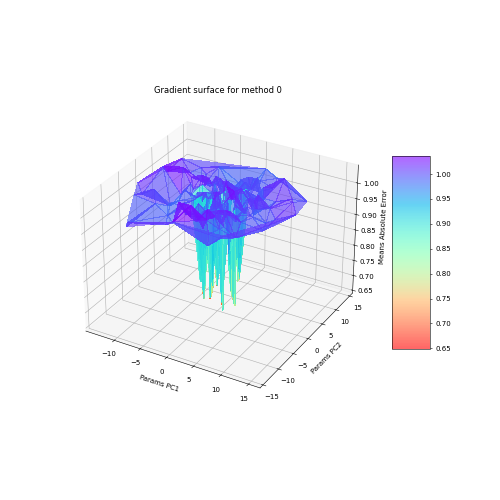

In [29]:
from sklearn.decomposition import PCA

def plotSurface(surface:pd.DataFrame, path=None, paths=None, title = '', save:str = None, dpi = 80, pcs=(0, 1), pc_max=2, plot_path=True):
    '''
    use %matplotlib widget for interative plot!
    '''
    if path is not None:
        data = pd.concat([surface, path], ignore_index=True)
    if paths is not None:
        data = surface
        for p in paths:
            data = pd.concat([data, p], ignore_index=True)
        print(data.info)
    else:
        data = surface  

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]
    pca = PCA(n_components=pc_max)
    pca.fit(parameters)
    principalSurfaceData = pca.transform(parameters)
    print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
    
    principalSurfaceDataDF = pd.DataFrame()
    principalSurfaceDataDF['x'] = principalSurfaceData[:, pcs[0]]
    principalSurfaceDataDF['y'] = principalSurfaceData[:, pcs[1]]
    principalSurfaceDataDF['z'] = zValue
    
    from mpl_toolkits.mplot3d import Axes3D
    surfaceXs = principalSurfaceDataDF['x']
    surfaceYs = principalSurfaceDataDF['y']
    surfaceZs = principalSurfaceDataDF['z']
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params PC{pcs[0]+1}')
    ax.set_ylabel(f'Params PC{pcs[1]+1}')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(surfaceXs,
                       surfaceYs,
                       surfaceZs,
                       cmap=plt.get_cmap('rainbow_r'),
                       linewidth=1,
                       antialiased=False,
                       alpha=0.6)
    
    plt.colorbar(plot, shrink=0.5, aspect=5)

    if path is not None and plot_path:
        pathParameters = path.iloc[:,:-1]
        pathZvalue = path.iloc[:,-1]
        principalPathData = pca.transform(pathParameters)
        principalPathDataDF = pd.DataFrame()
        principalPathDataDF['x'] = principalPathData[:, pcs[0]]
        principalPathDataDF['y'] = principalPathData[:, pcs[1]]
        principalPathDataDF['z'] = pathZvalue
        
        ax.plot3D(principalPathDataDF['x'],
                principalPathDataDF['y'],
                principalPathDataDF['z'],
                color='red',
                linewidth=3,
                antialiased=False,
                alpha=1)

    plt.show()

    if save:
        plt.savefig(save)

%matplotlib widget
plotSurface(surface0, paths=[path0_0, path0_1, path0_2, path0_3, path0_4, path0_5, path0_6, path0_7, path0_8, path0_9], title='Gradient surface for method 0', dpi=50, save='m0.png')

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.118s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 3.274024
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.574009
[t-SNE] KL divergence after 300 iterations: 0.233562
t-SNE done! Time elapsed: 1.5207889080047607 seconds


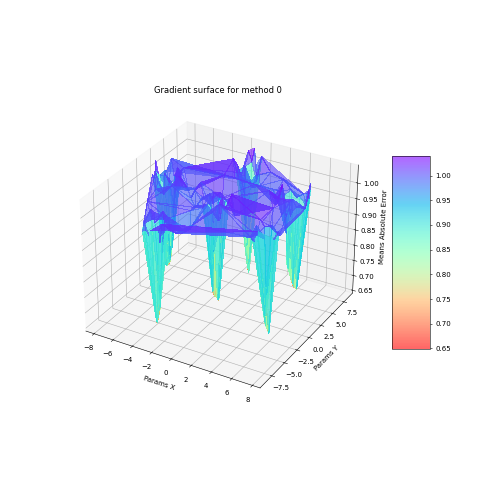

In [11]:
from sklearn.manifold import TSNE
import time
%matplotlib widget

def plotTSNESurface(surface:pd.DataFrame, path=None,paths=None, title = '', save:str = None, dpi = 120, pcs=(0, 1), pc_max=2, plot_path=False):

    # data = pd.concat([surface, path], ignore_index=True)

    if path is not None:
        data = pd.concat([surface, path], ignore_index=True)
    if paths is not None:
        data = surface
        for p in paths:
            data = pd.concat([data, p], ignore_index=True)
    else:
        data = surface 

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]
    
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
    tsne_results = tsne.fit_transform(parameters)
    
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title('Gradient surface for method 0')
    
    plot = ax.plot_trisurf(tsne_results[:,0],
                           tsne_results[:,1],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    # In TSNE you cannot add more data points
    if path is not None and plot_path:
        pathParameters = path.iloc[:,:-1]
        pathZvalue = path.iloc[:,-1]

        tsne_path_results = tsne.fit_transform(pathParameters)

        ax.plot3D(tsne_path_results[:,0],
                  tsne_path_results[:,1],
                  pathZvalue,
                  color='red',
                  linewidth=10,
                  antialiased=False,
                  alpha=1)

    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

plotTSNESurface(surface0, paths=[path0_0, path0_1, path0_2, path0_3, path0_4, path0_5], title='Gradient surface for method 0', dpi=50) #, save='m0.png')

<bound method DataFrame.info of            0         1         2         3         4         5         6    \
0     3.402452 -0.562998  3.445298 -2.177756 -5.084267  5.013726  1.525471   
1    -0.548563  1.662369 -2.370138  0.417246 -5.442439  5.460376 -2.271897   
2     5.453705 -6.206980 -0.492765  5.879985 -6.101442 -3.778811  0.286033   
3     1.487763 -3.028820  5.074301 -0.672424  5.522429  0.592295 -4.460180   
4    -2.791016 -2.470909 -2.357422  4.452453  2.297998  2.307069  4.371815   
...        ...       ...       ...       ...       ...       ...       ...   
1195  1.221393 -0.460121 -0.078774  0.148316 -0.682768 -0.765255  0.567754   
1196  1.213430 -0.448180 -0.065759  0.163198 -0.665734 -0.753442  0.555119   
1197  1.224513 -0.448459 -0.068634  0.149351 -0.685475 -0.765724  0.567273   
1198  1.209426 -0.437764 -0.053190  0.165947 -0.665308 -0.754446  0.554382   
1199  1.228228 -0.436639 -0.059528  0.149568 -0.687471 -0.766492  0.567070   

           7         8         

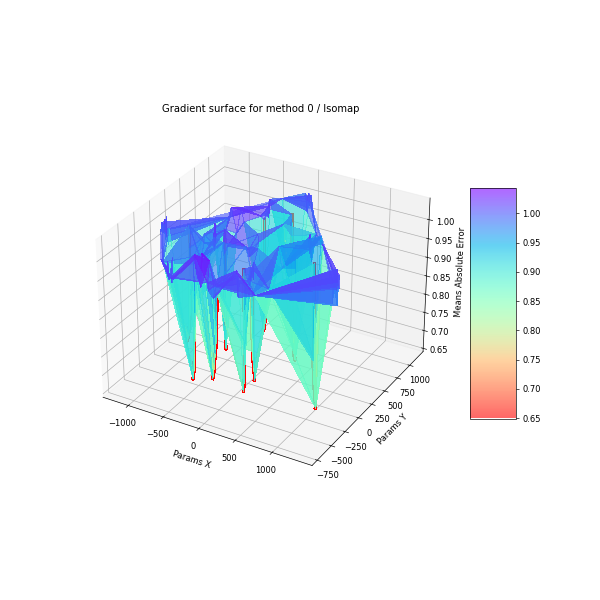

In [28]:
from sklearn.manifold import Isomap
import time
%matplotlib widget

def plotIsomapSurface(surface:pd.DataFrame, path=None, paths=None, title = 'Gradient surface', 
                    save:str = None, dpi = 120, pcs=(0, 1), pc_max=3, plot_path=True,
                    metric='minkowski'):

    # data = pd.concat([surface, path], ignore_index=True)
    if path is not None:
        data = pd.concat([surface, path], ignore_index=True)
    if paths is not None:
        data = surface # Take the surface
        for p in paths: 
            data = pd.concat([data, p], ignore_index=True) # Add every paths to surface
        print(data.info)
    else:
        data = surface  

    parameters = data.iloc[:,:-1] # All the paths plus Surface
    zValue = data.iloc[:,-1] # Height
    
    time_start = time.time()
    tsne = Isomap(n_components=pc_max, n_neighbors=10, metric=metric).fit(parameters)
    tsne_results = tsne.transform(parameters)
    
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(tsne_results[:,pcs[0]],
                           tsne_results[:,pcs[1]],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    if path is not None and plot_path:
        pathParameters = path.iloc[:,:-1]
        pathZvalue = path.iloc[:,-1]

        tsne_path_results = tsne.transform(pathParameters)

        ax.plot3D(tsne_path_results[:,pcs[0]],
                  tsne_path_results[:,pcs[1]],
                  pathZvalue,
                  color='red',
                  linewidth=3,
                  antialiased=False,
                  alpha=1)
    
    if paths is not None and plot_path:
        for p in paths:
            pathParameters = p.iloc[:, :-1]
            pathZvalue = p.iloc[:,-1]

            tsne_path_results = tsne.transform(pathParameters)

            ax.plot3D(tsne_path_results[:,pcs[0]],
                  tsne_path_results[:,pcs[1]],
                  pathZvalue,
                  color='red',
                  linewidth=3,
                  antialiased=False,
                  alpha=1)

    print('Isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

# Possible values for 'metric', default is 'minkowski'
metrics = {'haversine', 'precomputed', 'russellrao', 'euclidean', 'seuclidean', 'correlation', 'sokalsneath', 'l2', 'dice', 'wminkowski', 
           'chebyshev', 'minkowski', 'sqeuclidean', 'canberra', 'jaccard', 'yule', 'cityblock', 'nan_euclidean', 'sokalmichener', 
           'rogerstanimoto', 'braycurtis', 'hamming', 'l1', 'mahalanobis', 'cosine', 'manhattan'}
plotIsomapSurface(surface0, paths=[path0_0, path0_1, path0_2, path0_3, path0_4, path0_5, path0_6, path0_7, path0_8, path0_9], title='Gradient surface for method 0 / Isomap', metric='l1', # good: minkowski, cityblock, manhattan, chebyshev, euclidean, nan_euclidean, l1, l2
                  dpi=60, pcs=(0,1), pc_max=5, save='m0_isomap.png')

<bound method DataFrame.info of           0         1         2         3         4         5         6    \
0    3.402452 -0.562998  3.445298 -2.177756 -5.084267  5.013726  1.525471   
1   -0.548563  1.662369 -2.370138  0.417246 -5.442439  5.460376 -2.271897   
2    5.453705 -6.206980 -0.492765  5.879985 -6.101442 -3.778811  0.286033   
3    1.487763 -3.028820  5.074301 -0.672424  5.522429  0.592295 -4.460180   
4   -2.791016 -2.470909 -2.357422  4.452453  2.297998  2.307069  4.371815   
..        ...       ...       ...       ...       ...       ...       ...   
595 -0.544665  0.784369  0.421790  0.263269 -0.425021 -0.344999  0.572336   
596 -0.541222  0.763203  0.419253  0.284700 -0.416677 -0.326427  0.552570   
597 -0.555038  0.787153  0.420891  0.264656 -0.419510 -0.344131  0.569774   
598 -0.549679  0.766326  0.420169  0.284673 -0.413978 -0.327316  0.551332   
599 -0.565162  0.790454  0.419878  0.265445 -0.412590 -0.343458  0.567254   

          7         8         9    ...     

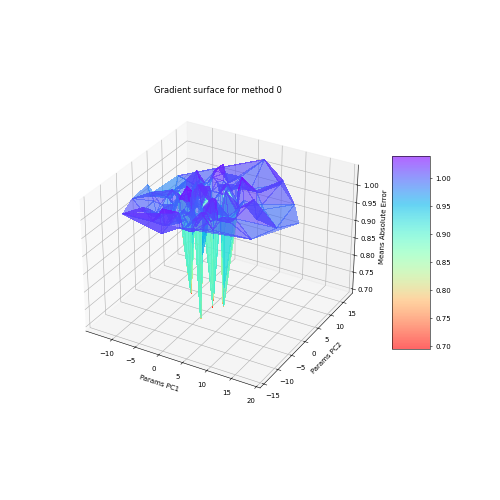

In [8]:
%matplotlib widget
plotSurface(surface0, paths=[path0_0, path0_1, path0_2, path0_3], title='Gradient surface for method 0', dpi=50, save='m0.png')

In [ ]:
from sklearn.manifold import Isomap
import time
%matplotlib widget

def plotIsomapSurface(surface:pd.DataFrame, path=None, title = 'Gradient surface', 
                    save:str = None, dpi = 120, pcs=(0, 1), pc_max=3, plot_path=True,
                    metric='minkowski'):

    # data = pd.concat([surface, path], ignore_index=True)
    if path is not None:
        data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]
    
    time_start = time.time()
    tsne = Isomap(n_components=pc_max, n_neighbors=10, metric=metric).fit(parameters)
    tsne_results = tsne.transform(parameters)
    
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(tsne_results[:,pcs[0]],
                           tsne_results[:,pcs[1]],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    if path is not None and plot_path:
        pathParameters = path.iloc[:,:-1]
        pathZvalue = path.iloc[:,-1]

        tsne_path_results = tsne.transform(pathParameters)

        ax.plot3D(tsne_path_results[:,pcs[0]],
                  tsne_path_results[:,pcs[1]],
                  pathZvalue,
                  color='red',
                  linewidth=3,
                  antialiased=False,
                  alpha=1)

    print('Isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

# Possible values for 'metric', default is 'minkowski'
metrics = {'haversine', 'precomputed', 'russellrao', 'euclidean', 'seuclidean', 'correlation', 'sokalsneath', 'l2', 'dice', 'wminkowski', 
           'chebyshev', 'minkowski', 'sqeuclidean', 'canberra', 'jaccard', 'yule', 'cityblock', 'nan_euclidean', 'sokalmichener', 
           'rogerstanimoto', 'braycurtis', 'hamming', 'l1', 'mahalanobis', 'cosine', 'manhattan'}
plotIsomapSurface(surface0, path=path0, title='Gradient surface for method 0 / Isomap', metric='l1', # good: minkowski, cityblock, manhattan, chebyshev, euclidean, nan_euclidean, l1, l2
                  dpi=120, pcs=(0,1), pc_max=5, save='m0_isomap.png')

In [9]:
!pip list | grep -e qiskit -e torch

qiskit                    1.0.2
qiskit-aer                0.14.1
qiskit-algorithms         0.3.0
qiskit-ibm-runtime        0.23.0
qiskit-machine-learning   0.7.2
qiskit_qulacs             0.0.0
torch                     1.11.0
torchsummary              1.5.1
torchvision               0.14.1
